In [1]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns   

In [ ]:
# Cargamos los archivos nuevamente con las nuevas versiones
file_path_sd = "sandiego_estadosunidos.csv"
file_path_mx = "Mexico.csv"

df_sd = pd.read_csv(file_path_sd)
df_mx = pd.read_csv(file_path_mx)



In [ ]:
# Combinamos ambos datasets para un análisis conjunto
df = pd.concat([df_sd, df_mx], ignore_index=True)
df

,id,host_id,listing_url,last_scraped,host_since,first_review,last_review,host_name,host_response_time,host_response_rate,...,calendar_updated,calculated_host_listings_count_shared_rooms,host_location,source,neighbourhood_group_cleansed,name,neighbourhood_group,neighbourhood,reviews_per_month,calculated_host_listings_count
0,6,29,https://www.airbnb.com/rooms/6,2024-12-23,2008-03-03,2008-06-22,2024-10-20,Sara,within an hour,100%,...,NaN,0.0,"San Diego, CA",city scrape,NaN,NaN,NaN,NaN,NaN,NaN
1,12447,48669,https://www.airbnb.com/rooms/12447,2024-12-23,2009-10-27,2011-11-10,2024-10-25,Jennifer,within an hour,100%,...,NaN,0.0,"San Diego, CA",city scrape,NaN,NaN,NaN,NaN,NaN,NaN
2,29967,129123,https://www.airbnb.com/rooms/29967,2024-12-23,2010-05-21,2010-07-09,2024-08-22,Michael,within a few hours,90%,...,NaN,0.0,"San Diego, CA",city scrape,NaN,NaN,NaN,NaN,NaN,NaN
3,54001,252692,https://www.airbnb.com/rooms/54001,2024-12-23,2010-10-04,2011-01-04,2024-11-02,Marsha,within a few hours,100%,...,NaN,0.0,"San Diego, CA",city scrape,NaN,NaN,NaN,NaN,NaN,NaN
4,62274,302986,https://www.airbnb.com/rooms/62274,2024-12-23,2010-11-28,2010-12-05,2024-11-30,Isabel,within an hour,100%,...,NaN,0.0,"San Diego, CA",city scrape,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39120,1318906185008171760,369403303,NaN,NaN,NaN,NaN,NaN,Grissell,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Suite Dumas Polanco 8D,NaN,Miguel Hidalgo,NaN,12.0
39121,1318960023050066631,525554527,NaN,NaN,NaN,NaN,NaN,Partner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Departamento amueblado en CDMX,NaN,Cuauhtémoc,NaN,1.0
39122,1318997244771691320,293574406,NaN,NaN,NaN,NaN,NaN,Bellanira Isabel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,hospedaje en Coyoacán CDMX,NaN,Coyoacán,NaN,8.0
39123,1319078571963617776,35255741,NaN,NaN,NaN,NaN,NaN,Juan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3 recámaras 3 baños con estacionamiento,NaN,Miguel Hidalgo,NaN,31.0


In [ ]:
# Seleccionamos solo columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['id', 'host_id', 'host_total_listings_count', 'latitude', 'longitude',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'calendar_updated',
       'calculated_host_listings_count_shared_rooms',
       'neighbourhood_group_cleansed', 'neighbourhood_group',
       'reviews_per_month', 'calculated_host_listings_count'],
      dtype='object')

In [12]:
# Función para detectar y eliminar outliers usando Desviación Estándar
def remove_outliers_std(df, cols):
    df_clean = df.copy()
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        df_clean = df_clean[(df_clean[col] >= mean - 3 * std) & (df_clean[col] <= mean + 3 * std)]
    return df_clean

In [13]:
# Función para detectar y eliminar outliers usando Rango Intercuartílico (IQR)
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [ ]:
# Aplicamos métodos
df_std_clean = remove_outliers_std(df, numeric_cols)
df_iqr_clean = remove_outliers_iqr(df, numeric_cols)


In [ ]:
# Graficamos Diagramas de Caja antes y después
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numeric_cols])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

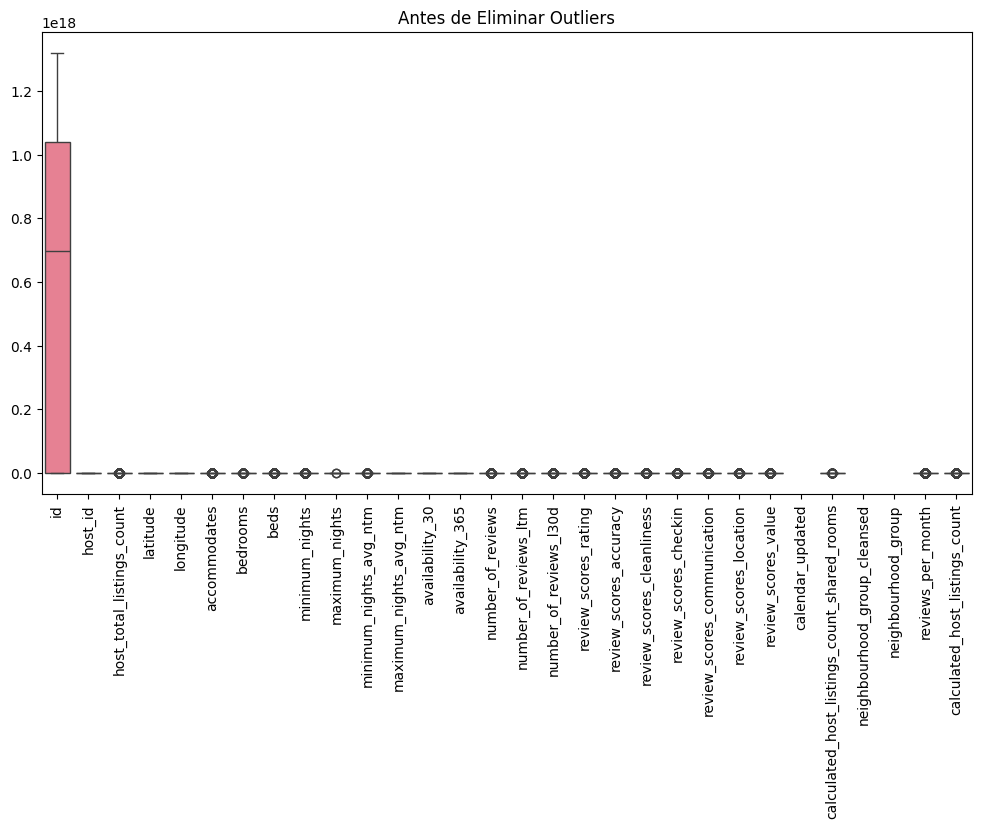

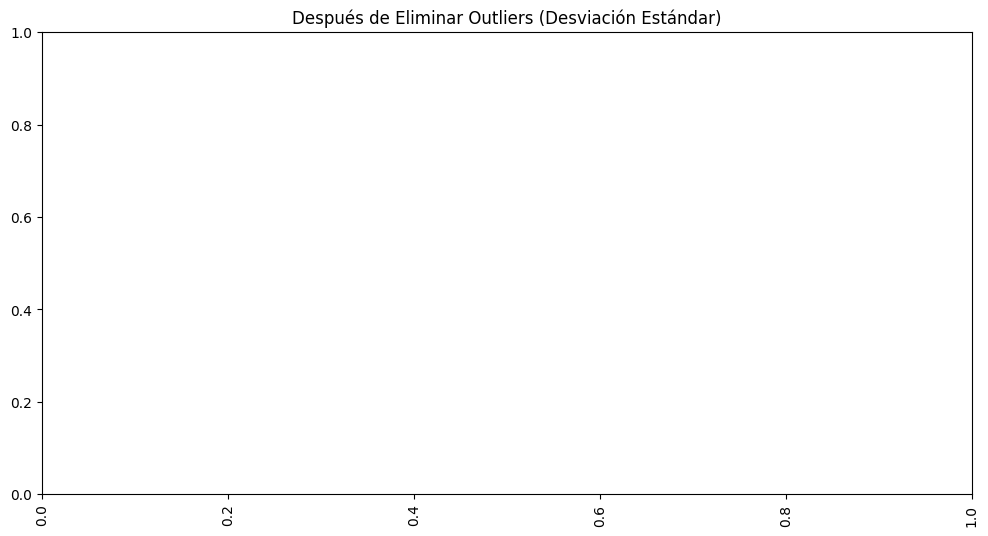

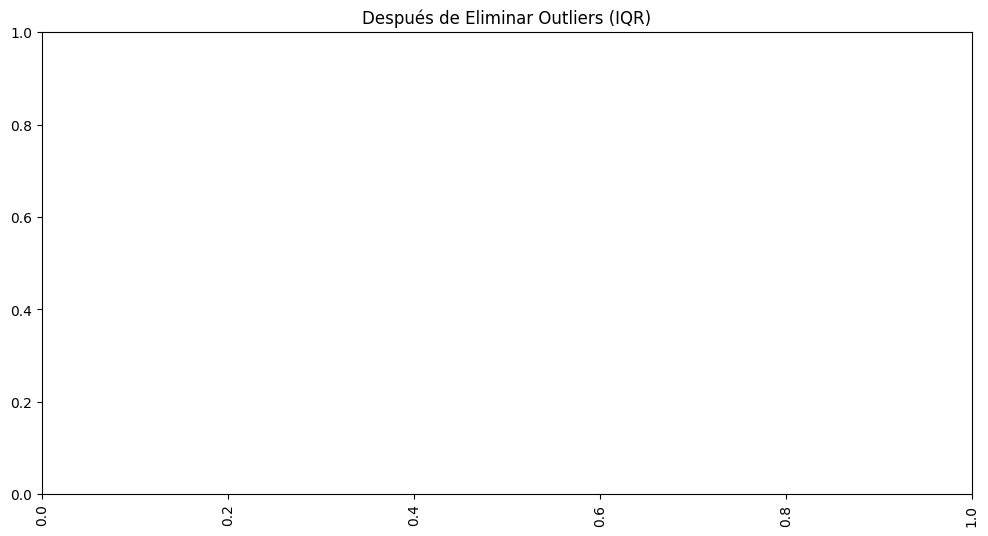

In [ ]:
# Mostramos diagramas antes y después
plot_boxplots(df, "Antes de Eliminar Outliers")
plot_boxplots(df_std_clean, "Después de Eliminar Outliers (Desviación Estándar)")
plot_boxplots(df_iqr_clean, "Después de Eliminar Outliers (IQR)")

In [ ]:
# Guardamos datasets limpios
df_std_clean.to_csv("datos_sin_outliers_std.csv", index=False)
df_iqr_clean.to_csv("datos_sin_outliers_iqr.csv", index=False)

In [ ]:
# Mostramos mensaje de finalización
df_std_clean.shape, df_iqr_clean.shape

((0, 55), (0, 55))